# Part 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df=pd.read_csv('/content/drive/MyDrive/CodingDojo/05-IntermediateML/Week17/Data/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


- What is the target?
   - The target is income.
- What does one row represent?
   - One row represnts a person.

In [ ]:
#Checking for any correct datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


- No inconsistencies with the data types.
- How many features does the data have?
   - 14 features.
- How many rows are in the dataset?
   - 48,842 rows.

In [ ]:
#Checking for null values
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

- No missing values.

In [ ]:
#checking for duplicates
df_duplicated_rows=df.duplicated(keep=False)
df_duplicated_rows.sum()

101

In [ ]:
#Investigating the duplicated rows:
df[df_duplicated_rows]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
488,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1319,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
1668,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
1854,22,Private,137876,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,20,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46665,20,?,203353,Some-college,10,Never-married,?,Own-child,White,Female,0,0,40,United-States,<=50K
46979,22,?,334593,Some-college,10,Never-married,?,Not-in-family,White,Male,0,0,40,United-States,<=50K
47126,46,Private,133616,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48274,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K


- Most of the duplicates just need to have 1 of their records dropped so as to rectify the data.

In [53]:
#Addressing the duplicated data by dropping one row of each record
df=df.drop_duplicates(keep='first')

In [ ]:
#checking if duplicate values have been addressed:
df.duplicated().sum()

0

In [5]:
#Looking for inconsistencies in the dataset
obj_cols=df.select_dtypes('object')

In [ ]:
#Getting the value counts for all object columns:
for cols in obj_cols:
  print(f'The value count for {cols}')
  print(df.value_counts(cols))
  print('\n');

The value count for workclass
workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


The value count for education
education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: count, dtype: int64


The value count for marital-status
marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: count

- We have '?' in the 'workclass', 'occupation' and 'native-country' columns with significant values. We need to address them.

In [54]:
#The 'occupation' column the category '?' values will be assigned to the category 'Other-service'
df['occupation']=df['occupation'].str.replace('?','Other-service')
df['occupation'].value_counts()

occupation
Other-service        7724
Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Machine-op-inspct    3017
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64

In [55]:
#In the 'workclass' column the category '?' values will be assigned to a new category 'Unknown'
df['workclass']=df['workclass'].str.replace('?','Unknown')
#Checking results
df['workclass'].value_counts()

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
Unknown              2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [56]:
#In the 'native-country' column the category '?' values will be assigned to most frequent category 'United States'.
#Remove the whitespaces
df['native-country'] = df['native-country'].str.strip()
#Assigning to the United-States category
df['native-country'] = df['native-country'].replace('?', 'United-States')
#Checking results
df['native-country'].value_counts()

native-country
United-States                 44648
Mexico                          943
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Vietnam                          86
Guatemala                        86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [57]:
#The marital statuses known are: single, married, widowed, divorced, separated, registered partnesrhips
#I need to address that: for the married category
df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],'Married')
#Never-married will be single marital status:
df['marital-status'] = df['marital-status'].replace('Never-married', 'Single')
#Checking results:
df['marital-status'].value_counts()

marital-status
Married      23030
Single       16082
Divorced      6630
Separated     1530
Widowed       1518
Name: count, dtype: int64

In [58]:
#Addressing the different education levels:
df['education'] = df['education'].str.strip()

df['education'] = df['education'].replace(['Preschool','1st-4th'],'Elementary')
df['education'] = df['education'].replace(['5th-6th','7th-8th'],'Middle school')
df['education'] = df['education'].replace(['12th','9th','10th','11th','HS-grad'],'High school')
df['education'] = df['education'].replace('Prof-school','Doctorate')
df['education'] = df['education'].replace(['Assoc-acdm','Assoc-voc'],'Tertiary')
df['education'] = df['education'].replace('Some-college','College')

df['education'].value_counts()

education
High school      20382
College          10863
Bachelors         8013
Tertiary          3661
Masters           2656
Middle school     1461
Doctorate         1428
Elementary         326
Name: count, dtype: int64

In [59]:
#Addressing the income Target class:
df['income'] = df['income'].replace({'<=50K': 0, '>50K': 1})
df['income'].value_counts()

income
0    37109
1    11681
Name: count, dtype: int64

In [11]:
#Checking if there're any inconsistencies in the numeric columns
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886,0.239414
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729,0.426730
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


- No inconsistencies in the numeric columns.

## Univariant Plots

<ipython-input-103-9ae9ba16659e>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


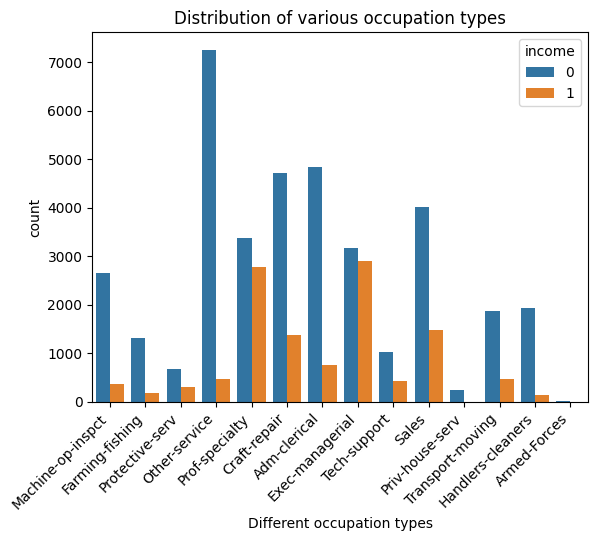

In [ ]:
#Boxplot showing different types of occupations
ax=sns.countplot(df,x='occupation',hue='income')
ax.set_xlabel('Different occupation types')
ax.set_title('Distribution of various occupation types')

# Rotate xtick labels and align the text to the bar
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

- This countplot clearly shows that the occupation doesn't influence having a higher income of >50k.

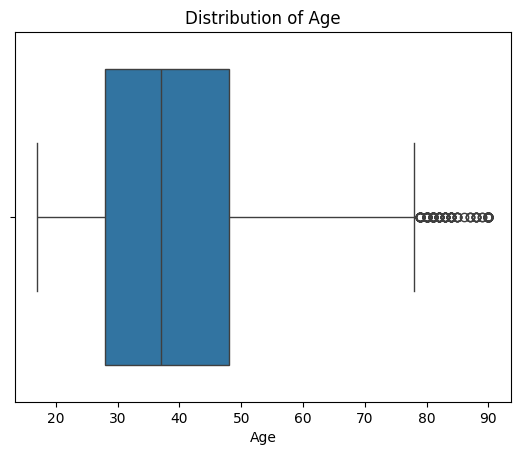

In [ ]:
#Boxplot showing different age groups
ax=sns.boxplot(df,x='age')
ax.set_xlabel('Age')
ax.set_title('Distribution of Age');

- Most people working for an income are within the age range of 28-48 years.
- There are however some few outliers of people earning an income, between the ages of 78-90 years.

## Multivariant Plots

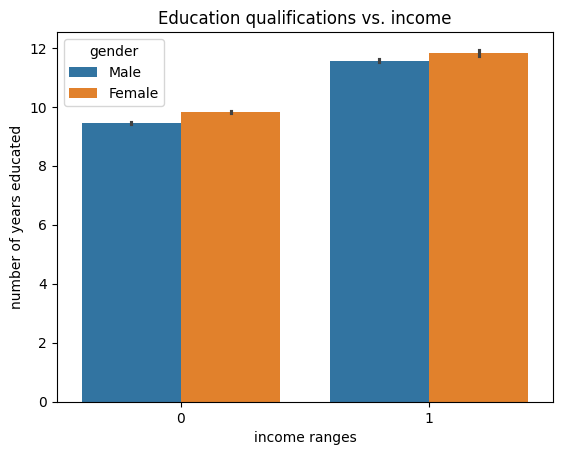

In [ ]:
#Let's explore the relationship between educational-num and income:
ax=sns.barplot(df,x='income',y='educational-num', hue='gender')
ax.set_xlabel('income ranges')
ax.set_ylabel('number of years educated')
ax.set_title('Education qualifications vs. income');

- Females are predominating in both income ranges <=50k & >50k.


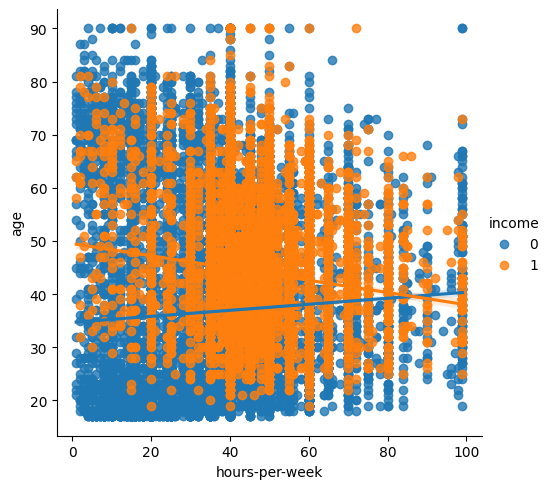

In [ ]:
#Exploring the relationship between hours-per-week and age:
ax=sns.lmplot(df,x='hours-per-week',y='age',hue='income');

- Predominantly people between the ages of 20-62 years and also work for between 38-58 hours per week, secured high incomes of >50k.
- There are also afew outliers for the income group >50K, below 38 hours per week and above 58 hours per week.

Text(0.5, 1.0, 'Correlation heatmap')

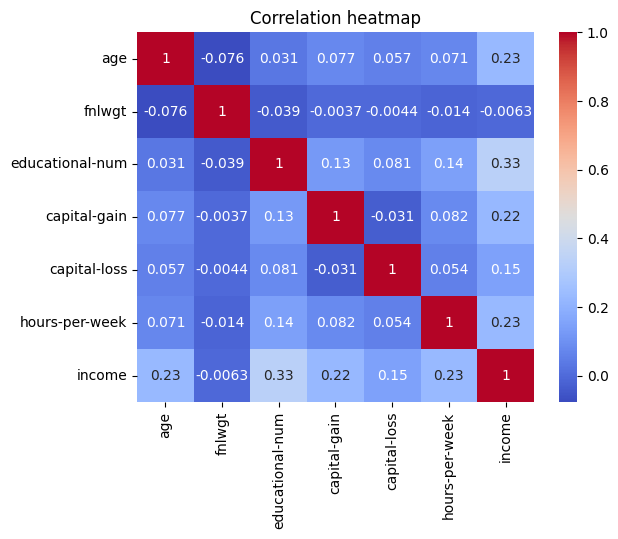

In [ ]:
#Heat map
corr=df.corr(numeric_only=True)
ax=sns.heatmap(corr, annot=True, cmap='coolwarm')
ax.set_title('Correlation heatmap')

- For the numeric features, it can be seen that 'age', 'educational-num','hour-per-week', and 'capital-gain' have a strong positive correlation with 'income'.

## Preprocessing the Data


In [12]:
# Imports
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn import set_config
set_config(transform_output='pandas')
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [60]:
 #Define X and y
target = 'income'
X = df.drop(columns=target)
y = df[target]

In [61]:
# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
38093,82,Unknown,194590,Tertiary,11,Widowed,Other-service,Not-in-family,White,Female,0,0,8,United-States
43391,30,State-gov,48214,Masters,14,Married,Prof-specialty,Wife,White,Female,0,0,50,United-States
3064,28,Private,340269,High school,9,Married,Craft-repair,Husband,White,Male,3137,0,45,United-States
45606,20,Unknown,133515,College,10,Single,Other-service,Own-child,White,Female,0,0,15,France
2116,39,Private,67433,High school,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11287,54,Self-emp-not-inc,164757,Tertiary,11,Married,Craft-repair,Husband,White,Male,0,0,16,United-States
44775,41,Private,172828,High school,5,Married,Other-service,Husband,White,Male,0,0,55,Outlying-US(Guam-USVI-etc)
38190,22,Private,416356,College,10,Single,Craft-repair,Unmarried,White,Male,0,0,40,United-States
860,46,State-gov,96652,Tertiary,11,Separated,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States


In [62]:
#Getting the object type columns
cat = X_train.select_dtypes("object").columns
cat

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')

In [63]:
#Instantiating the One Hot Encoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
#Categorical pipeline
cat_pipe = make_pipeline(ohe)

In [64]:
#Categorical tuple
cat_tuple=('categorical',cat_pipe,cat)

In [65]:
#Getting the numeric columns
num_cols = X_train.select_dtypes("number").columns
num_cols

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [66]:
#The scaler
scaler = StandardScaler()
#The numeric pipeline
num_pipe=make_pipeline(scaler)

In [67]:
#Numeric tuple
num_tuple=('numeric',num_pipe,num_cols)

In [68]:
preprocessor = ColumnTransformer([num_tuple, cat_tuple],
                                    verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [80]:
 y_train.value_counts(normalize=True)

income
0    0.760849
1    0.239151
Name: proportion, dtype: float64

- We have imbalanced classes that need to be addressed.

- We are also going to perform oversampling using SMOTE, inorder to address the imbalanced classes.

In [69]:
#import imblearn pipeline
from imblearn.pipeline import make_pipeline as make_sampler_pipeline
from imblearn.over_sampling import SMOTE,SMOTENC
#smote intantiating
smote = SMOTE()

over_sample_pipe = make_sampler_pipeline(preprocessor, smote)
#Fitting the training data
X_train_sm, y_train_sm = over_sample_pipe.fit_resample(X_train, y_train)

### The Model
- The model we shall use is a Decision Tree classifier.
- We are also going to perform oversampling using SMOTE, inorder to address the imbalanced classes.

              precision    recall  f1-score   support

           0       0.96      0.73      0.83      9268
           1       0.51      0.89      0.65      2930

    accuracy                           0.77     12198
   macro avg       0.73      0.81      0.74     12198
weighted avg       0.85      0.77      0.79     12198



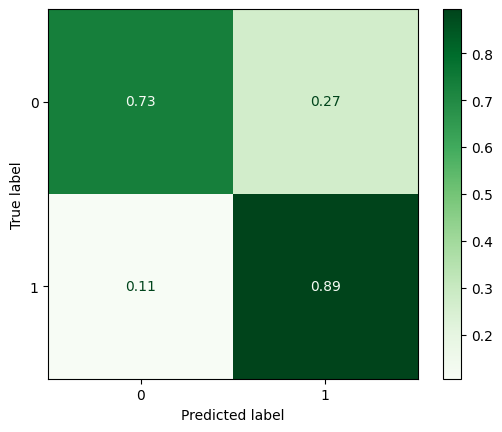

In [70]:
#Instantiate the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5)
#Fit and evaluate the model pipeline
clf.fit(X_train_sm, y_train_sm)
#Transform the test data using the preprocessor
X_test_tf = preprocessor.transform(X_test)
#prediction
test_preds = clf.predict(X_test_tf)
#Evaluating my model:
print(classification_report(y_test, test_preds))
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,normalize='true',cmap='Greens');

- This decision tree model performed well on the test data for the income group <=50K (class 0), with an F1-score(the perfect balance between precision and recall)of 0.83
- The model did not perform well on the test data for the income group >50K (class 1), with an F1-score of 0.65 the accuracy on the test data is 0.77 which isn't a good metric score for this model.

## Permutation importance
- To visualize the top 10 features.

In [72]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
result1 = permutation_importance(clf, X_test_tf, y_test, n_repeats=30, random_state=42, n_jobs=-1)

# Extract the feature names after transformation
encoded_categorical_feature_names1 = preprocessor.named_transformers_['categorical'].named_steps['onehotencoder'].get_feature_names_out(cat).tolist()
numeric_feature_names1 = num_cols.tolist()  # Convert to list if it's not already

# Combine feature names
feature_names1 = numeric_feature_names1 + encoded_categorical_feature_names1

# Display importance scores in descending order
importance_sorted_idx1 = result1.importances_mean.argsort()[::-1]
for i in importance_sorted_idx1:
    if i < len(feature_names1):  # Ensure index is within range
        print(f"{feature_names1[i]:<20}: {result1.importances_mean[i]:.4f}")


marital-status_Married: 0.0795
educational-num     : 0.0353
capital-gain        : 0.0304
age                 : 0.0195
hours-per-week      : 0.0028
capital-loss        : 0.0020
relationship_Husband: 0.0006
fnlwgt              : 0.0000
occupation_Other-service: 0.0000
occupation_Adm-clerical: 0.0000
occupation_Armed-Forces: 0.0000
occupation_Craft-repair: 0.0000
occupation_Exec-managerial: 0.0000
occupation_Farming-fishing: 0.0000
occupation_Handlers-cleaners: 0.0000
occupation_Machine-op-inspct: 0.0000
occupation_Sales    : 0.0000
occupation_Priv-house-serv: 0.0000
occupation_Prof-specialty: 0.0000
occupation_Protective-serv: 0.0000
marital-status_Single: 0.0000
occupation_Tech-support: 0.0000
occupation_Transport-moving: 0.0000
relationship_Not-in-family: 0.0000
relationship_Other-relative: 0.0000
relationship_Own-child: 0.0000
marital-status_Widowed: 0.0000
marital-status_Divorced: 0.0000
marital-status_Separated: 0.0000
native-country_Vietnam: 0.0000
workclass_Federal-gov: 0.0000
wor

#### Plotting the Top 10 features

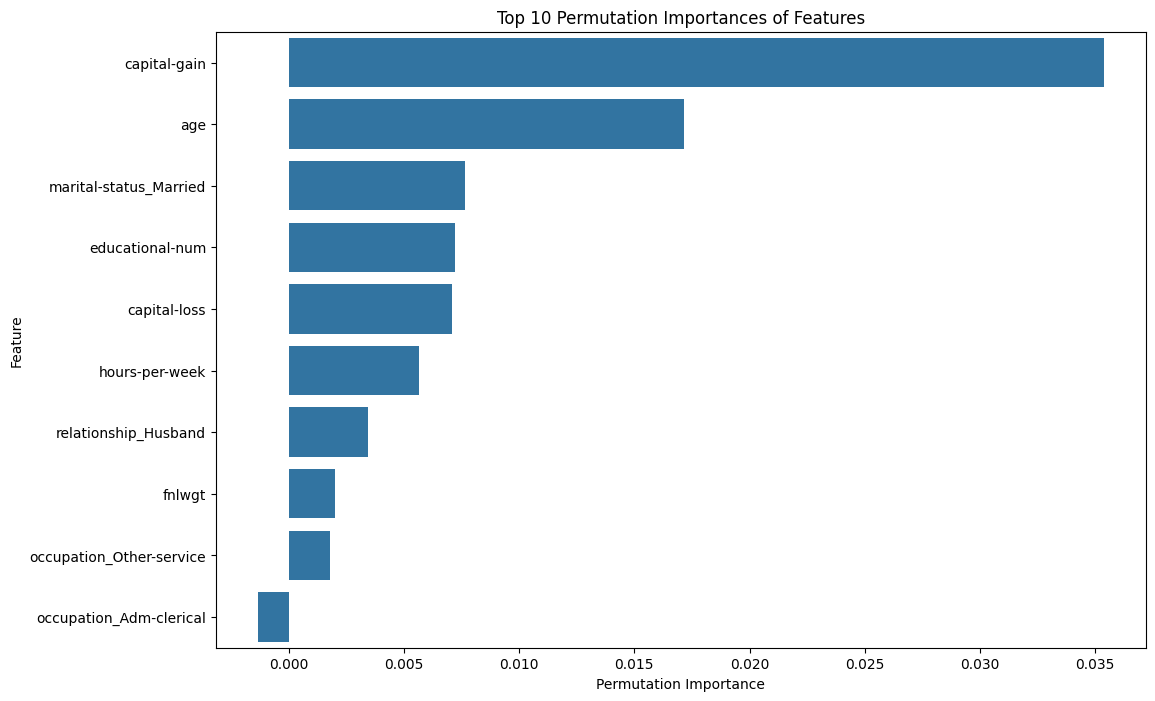

In [85]:
# Get the top 10 features
top_10_idx1 = importance_sorted_idx1[:10]
top_10_importances1 = result.importances_mean[top_10_idx1]
top_10_features1 = [feature_names1[i] for i in top_10_idx1]  # List comprehension for indexing

# Sorting the top 10 features and their importances in descending order
sorted_top_10_idx1 = np.argsort(top_10_importances1)[::-1]
sorted_top_10_importances1 = top_10_importances1[sorted_top_10_idx]
sorted_top_10_features1 = [top_10_features1[i] for i in sorted_top_10_idx]

# Plotting the permutation importances for the top 10 features in descending order
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_top_10_importances1, y=sorted_top_10_features1)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Top 10 Permutation Importances of Features')
plt.show()

- The top 10 features are: capital-gain,marital-status_Married, educational-num, capital-loss, hours-per-week,relationship_Husband, fnlwgt, occupation_Other-service,occupation_Adm-clerical.

In [86]:
# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


#### Feature 1: educational-num

In [90]:
feature1 = "educational-num"
df[feature1].dtype

dtype('int64')

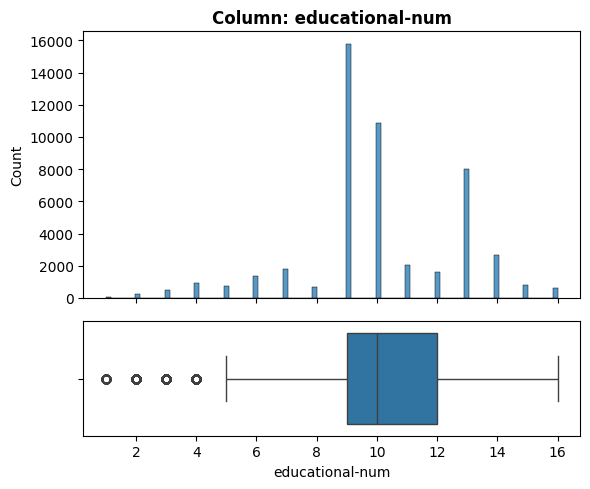

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: '9' occurs 15770 times (32.32%)
- Not constant or quasi-constant.


In [91]:
explore_numeric(df, x='educational-num', figsize=(6,5) );

#### Feature 2: capital-gain

In [30]:
feature2 = "capital-gain"
df[feature2].dtype

dtype('int64')

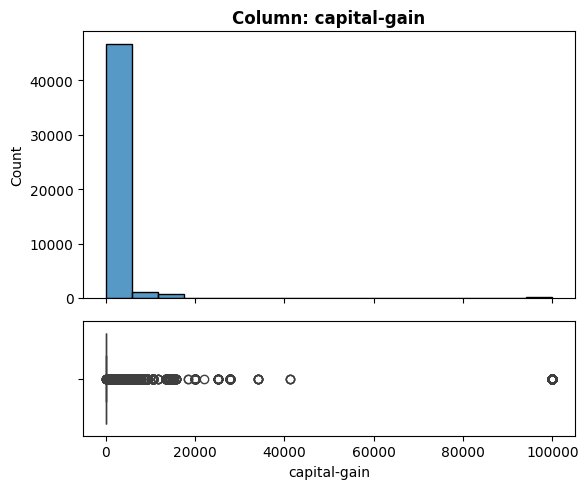

- NaN's Found: 0 (0.0%)
- Unique Values: 123
- Most common value: '0' occurs 44755 times (91.73%)
- Not constant or quasi-constant.


In [58]:
explore_numeric(df, x='capital-gain', figsize=(6,5) );

#### Feature 3: hours-per-week

In [89]:
feature3 = "hours-per-week"
df[feature3].dtype

dtype('int64')

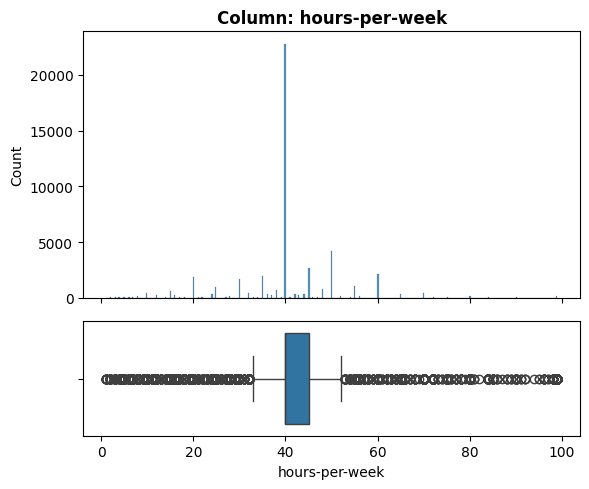

- NaN's Found: 0 (0.0%)
- Unique Values: 96
- Most common value: '40' occurs 22773 times (46.68%)
- Not constant or quasi-constant.


In [62]:
explore_numeric(df, x='hours-per-week', figsize=(6,5) );

#### Feature 4: capital-loss

In [91]:
feature4 = "capital-loss"
df[feature4].dtype

dtype('int64')

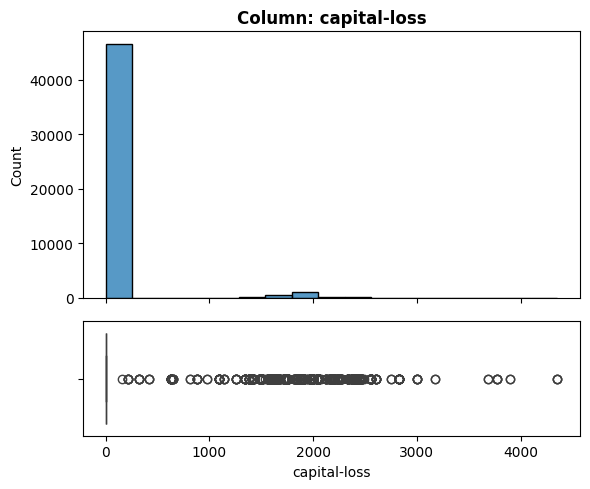

- NaN's Found: 0 (0.0%)
- Unique Values: 99
- Most common value: '0' occurs 46508 times (95.32%)
- Not constant or quasi-constant.


In [64]:
explore_numeric(df, x='capital-loss', figsize=(6,5) );

#### Feature 5: relationship

In [92]:
feature5 = "relationship"
df[feature5].dtype

dtype('O')

<ipython-input-23-9db5c58463e2>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


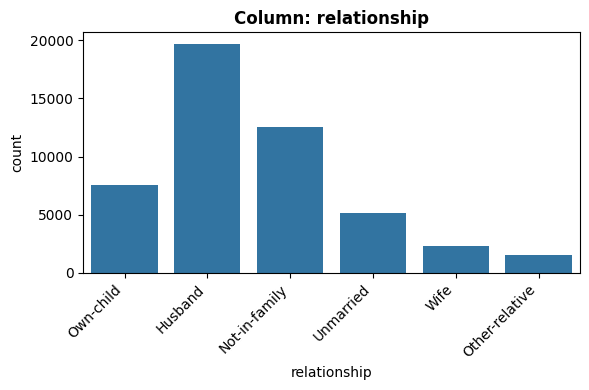

- NaN's Found: 0 (0.0%)
- Unique Values: 6
- Most common value: 'Husband' occurs 19703 times (40.38%)
- Not constant or quasi-constant.


In [25]:
explore_categorical(df, x='relationship', fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None);

#### Feature 6:fnlwgt

In [94]:
feature6 = "fnlwgt"
df[feature6].dtype

dtype('int64')

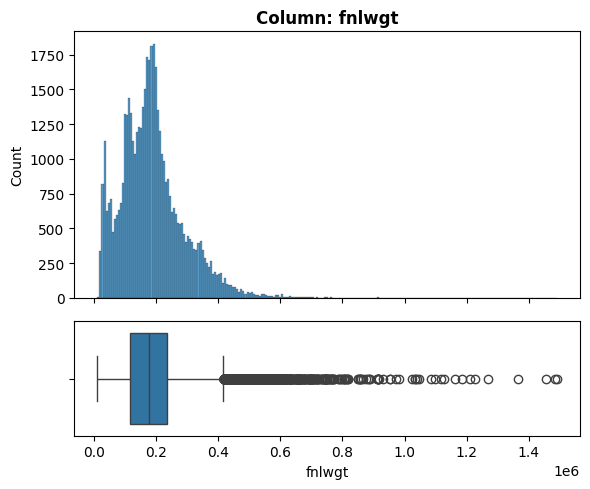

- NaN's Found: 0 (0.0%)
- Unique Values: 28523
- Most common value: '203488' occurs 21 times (0.04%)
- Not constant or quasi-constant.


In [94]:
explore_numeric(df, x='fnlwgt', figsize=(6,5) );

#### Feature 7: occupation

In [95]:
feature7 = "occupation"
df[feature7].dtype

dtype('O')

<ipython-input-89-9db5c58463e2>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


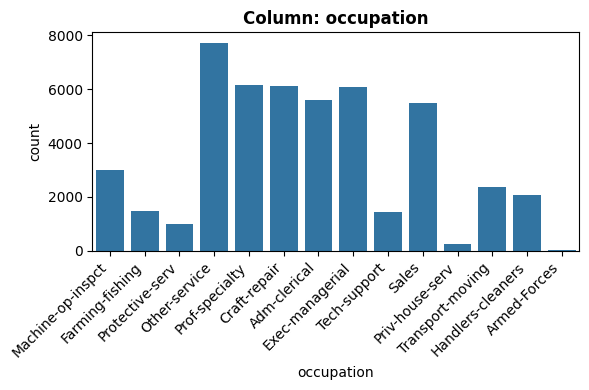

- NaN's Found: 0 (0.0%)
- Unique Values: 14
- Most common value: 'Other-service' occurs 7724 times (15.83%)
- Not constant or quasi-constant.


In [97]:
explore_categorical(df, x='occupation', fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None);

#### Feature 9: marital-status

In [98]:
feature9 = "marital-status"
df[feature9].dtype

dtype('O')

<ipython-input-89-9db5c58463e2>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


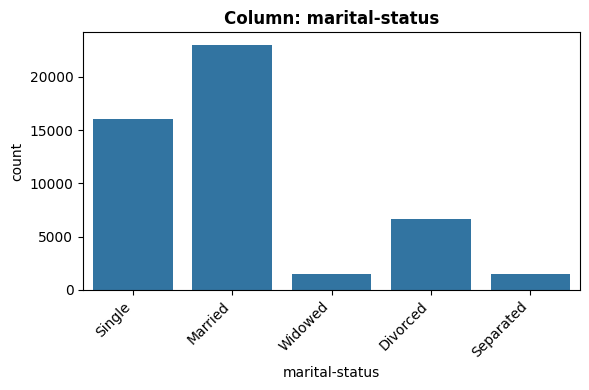

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'Married' occurs 23030 times (47.2%)
- Not constant or quasi-constant.


In [99]:
explore_categorical(df, x='marital-status', fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None);

- Do these features make sense based on the business case?
  - The Uni-variant feature plots show that the features plotted are not constant or quasi-constant and also do not have a high cardinality above 98%. We therefore cannot drop them yet.
  - With the business case being to ascertain if the features are contributing factors to an individual’s annual income, we cannot clearly make sense on how these features influence the business case since these are univariant feature plots. However, we can try to make sense of these features using multivariant plots where we plot both the feature and the target= 'income'. Feature Extraction using Principal Component Analysis (PCA) wouldn't suffice since the columns in the dataset are few(15 columns)
  - It can also be highlighted that you need to have some expert knowledge on assessing these demographic factors for individual income levels and also you need to be able to perform some logical sense out of these features E.g. I wouldn't think 'relationship' would play a contributing factor towards a person's income level. But still all these features are worth exploring further.

## Explanatory Visualizations for the 2 most important features: marital-status & capital-gain

### 1. Multivariate plot: Feature vs. Target

In [100]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. TARGET"""

def plot_categorical_vs_target(df, x, y='',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

#### Exploring marital-status vs income

<ipython-input-100-58ba6868da8a>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


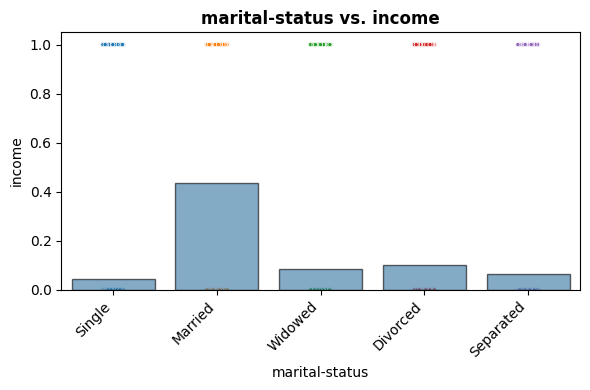

In [102]:
plot_categorical_vs_target(df, x='marital-status', y='income',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None);

- This multivariant plot reveals that as an individual progresses to higher levels of education, their income also increases.

#### Exploring capital-gain vs income

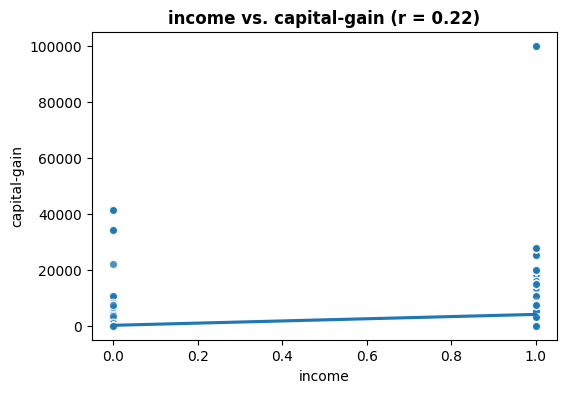

In [106]:
plot_numeric_vs_target(df, x='income', y='capital-gain',
                           figsize=(6,4));

- The capital-gain vs income multiplot shows that individuals below a capital-gain of 0 managed to secure an income. However, the plot also shows a couple of outliers, with individuals greater than 0 capital-gain securing an income of <=50K and also individuals still with a capital gain greater than 0 managing to secure an income >50K.
- capital-gain seems to not paint a clear picture of any relationship with an individual's income level.

- What opportunities exist for dimensionality reduction or feature selection with this dataset?
   - The opportunity that exists for dimensionality reduction on this dataset is both feature selection and feature extraction(using Principal Component Analysis).

- What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
  - Cleaning: There was duplicated data,unknown categories that needed to be classified, we needed to also aggregate some categories since some values belonged to the same category.
  - Exploring: No major challenges here since there are few columns to explore and visualize to make out patterns/trends for the business case.
  -Modeling: The model didn't perform well on the test data for predicting income levels of >50K.

# Part 2


### Feature Engineering

In [24]:
from sklearn.decomposition import PCA
#PCA to get 3 principal components for the data.
pca = PCA(n_components=3)

#Fitting and transforming the data
PCA_X_train = pca.fit_transform(X_train_sm)
PCA_X_test = pca.transform(X_test_tf)

# Preview the results
PCA_X_train.head()

,pca0,pca1,pca2
0,-0.440195,-0.481943,0.073214
1,0.196710,0.460195,-0.862986
2,-0.136428,-0.615962,0.274514
3,-1.247062,-1.539898,1.525219
4,-0.718599,-0.808961,0.314750


In [25]:
#PCs for the testing data
PCA_X_test.head()

,pca0,pca1,pca2
3169,-0.083168,0.099686,-0.664199
25270,0.079212,0.291024,-0.807671
33668,0.932048,-0.294659,0.028232
29925,0.202929,0.483926,-0.942754
11098,-0.510657,-0.502382,-0.133362


In [26]:
#Concatenate/combine these PC’s with the original features.
test_combined_PCA = pd.concat([PCA_X_test, X_test], axis = 1)
train_combined_PCA = pd.concat([PCA_X_train, X_train], axis = 1)

In [27]:
train_combined_PCA.head()

,pca0,pca1,pca2,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,-0.440195,-0.481943,0.073214,25.0,Private,226802.0,High school,7.0,Single,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States
1,0.196710,0.460195,-0.862986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.136428,-0.615962,0.274514,28.0,Local-gov,336951.0,Tertiary,12.0,Married,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States
3,-1.247062,-1.539898,1.525219,44.0,Private,160323.0,College,10.0,Married,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States
4,-0.718599,-0.808961,0.314750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
test_combined_PCA.head()

,pca0,pca1,pca2,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
3169,-0.083168,0.099686,-0.664199,54,State-gov,239256,College,10,Married,Adm-clerical,Husband,White,Male,0,0,40,United-States
25270,0.079212,0.291024,-0.807671,43,Private,60001,Bachelors,13,Divorced,Sales,Unmarried,White,Male,0,0,44,United-States
33668,0.932048,-0.294659,0.028232,29,Private,133696,Bachelors,13,Single,Prof-specialty,Not-in-family,White,Male,8614,0,45,United-States
29925,0.202929,0.483926,-0.942754,47,Private,191957,Bachelors,13,Married,Sales,Husband,Black,Male,0,0,40,United-States
11098,-0.510657,-0.502382,-0.133362,46,Private,23545,High school,9,Divorced,Protective-serv,Not-in-family,White,Male,0,0,40,United-States


## Clustering
- using KMeans.

## KMeans

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

krange=range(2,11)

inertias=[]
silhouettes=[]

for k in krange:
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(X_train_sm)
  inertias.append(kmeans.inertia_)
  silhouettes.append(silhouette_score(X_train_sm,kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

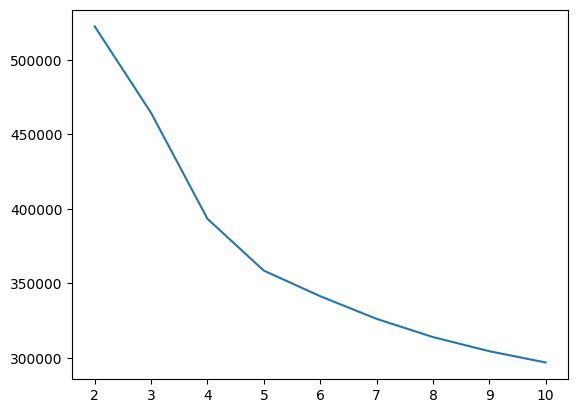

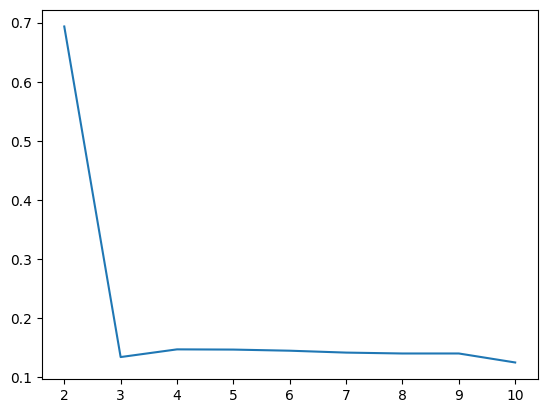

In [113]:
#The plots:
#Elbow Plot of inertia.
plt.plot(krange,inertias)

plt.show()
#A plot of Silhouette Scores
plt.plot(krange, silhouettes)

- The Elbow plot reveals 4 clusters, the silhouette_score plot reveals 2 clusters.
- Making a choice to go with the silhouette_score metric, k=2.

In [31]:
#Using 3 clusters to re-evaluate my model
kmeans_model= KMeans(n_clusters=2,random_state=42)

#Fitting the model on the training
kmeans_model.fit(X_train_sm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [32]:
#Getting predicted cluster labels for the training data
train_labels = kmeans_model.predict(X_train_sm)

In [33]:
#Getting predicted cluster labels for the test data
test_labels = kmeans_model.predict(X_test_tf)

In [34]:
train_labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [35]:
# Concatenate/combine these clusters with the original features:
#Adding cluster_labels column to X_test dataframe
X_test_tf['Cluster_Labels'] = test_labels
#Previewing the test data
X_test_tf.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,Cluster_Labels
3169,1.120136,0.466538,-0.033000,-0.145433,-0.217031,-0.036636,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
25270,0.316126,-1.229991,1.133336,-0.145433,-0.217031,0.284810,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
33668,-0.707161,-0.532517,1.133336,0.980288,-0.217031,0.365171,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
29925,0.608493,0.018884,1.133336,-0.145433,-0.217031,-0.036636,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
11098,0.535401,-1.575022,-0.421779,-0.145433,-0.217031,-0.036636,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [36]:
#Adding cluster_labels column to X_train_sm dataframe
X_train_sm['Cluster_Labels'] = train_labels
#Previewing the test data
X_train_sm.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,Cluster_Labels
0,3.166708,0.043804,0.355778,-0.145433,-0.217031,-2.608202,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,-0.634069,-1.341547,1.522115,-0.145433,-0.217031,0.766978,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,-0.780252,1.422558,-0.421779,0.264526,-0.217031,0.365171,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,-1.364987,-0.534230,-0.033000,-0.145433,-0.217031,-2.045672,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.023758,-1.159652,-0.421779,-0.145433,-0.217031,-0.036636,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


## Model: Random Forest Classifier
- Fit and evaluate a model using the new features and compare it to the model from Part 1.

In [37]:
#The custom Function
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
    # Get the classification report
    report = classification_report(y_true, y_pred)
    ## Print header and report
    header = "-"*70
    print(header, f" Classification Metrics: {label}", header, sep='\n')
    print(report)
    ## CONFUSION MATRICES SUBPLOTS
    fig, axes = plt.subplots(ncols=2, figsize=figsize)
    # create a confusion matrix  of raw counts
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
    axes[0].set_title("Raw Counts")
    # create a confusion matrix with the test data
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
    axes[1].set_title("Normalized Confusion Matrix")
    # Adjust layout and show figure
    fig.tight_layout()
    plt.show()
    # Return dictionary of classification_report
    if output_dict==True:
        report_dict = classification_report(y_true, y_pred, output_dict=True)
        return report_dict


def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
    # Get predictions for training data
    y_train_pred = model.predict(X_train)
    # Call the helper function to obtain regression metrics for training data
    results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
    print()
    # Get predictions for test data
    y_test_pred = model.predict(X_test)
    # Call the helper function to obtain regression metrics for test data
    results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
    if output_dict == True:
        # Store results in a dataframe if ouput_frame is True
        results_dict = {'train':results_train,
                    'test': results_test}
        return results_dict

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state = 42)
rf_clf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(random_state=42)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27841
           1       1.00      1.00      1.00     27841

    accuracy                           1.00     55682
   macro avg       1.00      1.00      1.00     55682
weighted avg       1.00      1.00      1.00     55682



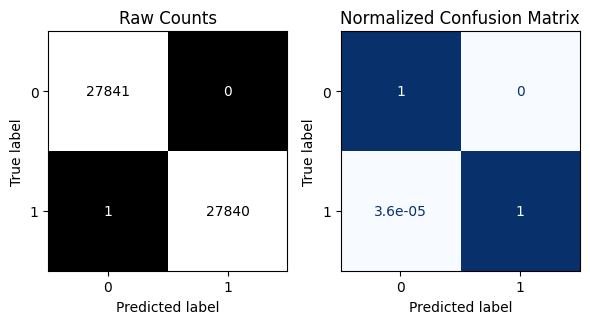


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      9268
           1       0.68      0.70      0.69      2930

    accuracy                           0.85     12198
   macro avg       0.79      0.80      0.79     12198
weighted avg       0.85      0.85      0.85     12198



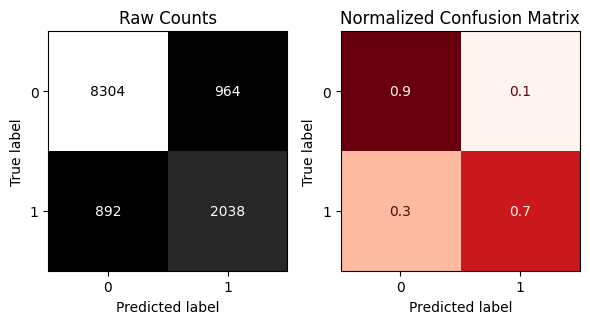

In [122]:
#Evaluate my model
evaluate_classification(rf_clf, X_train_sm, y_train_sm, X_test_tf, y_test)

- The model overfitted on the training data. Therefore I do not think it will provide the best predictions on the test data. We shall need to improve the model's performance on the test data.
- Including all of our features, the testing accuracy is 0.85. A sgnificant improvement from the first model with an accuracy of 0.77

## Applying feature selection
- Filter Method - Correlation

In [39]:
pip install collinearity

  Preparing metadata (setup.py) ... done
  Created wheel for collinearity: filename=collinearity-0.6.1-py3-none-any.whl size=4443 sha256=4af678a7cfea4230e8eb513ca6cb0c23481660b4dd201a2a8231c95ae0cf539b
  Stored in directory: /root/.cache/pip/wheels/0e/b1/ea/957b5269b023343361d1f3182a3bd03f8a6fbc86ce713ce7cb
Successfully built collinearity


In [40]:
from collinearity import SelectNonCollinear
from sklearn.feature_selection import f_classif

In [41]:
# Instantiate the selector, indicate correlation_threshold, and the appropriate scoring metric for the task
#Choosing a correlation_threshold =0.75
selector = SelectNonCollinear(correlation_threshold = 0.75, scoring = f_classif)

In [42]:
# Fit on the training data, use .values
selector.fit(X_train_sm.values, y_train_sm.values)

In [43]:
# obtaining a list of True or False matching with each feature
non_collinear = selector.get_support()
non_collinear[:10]

[True, True, True, True, True, True, True, True, True, True]

In [44]:
# Check how many features are below the theshold and we shall keep
non_collinear.count(True)

93

In [45]:
# Check how many features are above the theshold and we shall drop
non_collinear.count(False)

4

In [46]:
# Filter training data
training_data_to_keep = X_train_sm.values[:, non_collinear]
# Filter column names
columns = np.array(X_train_sm.columns)[non_collinear]
# Make traing data into a dataframe
X_train_no_corr = pd.DataFrame(training_data_to_keep, columns = columns)

# Filter testing data
test_data_to_keep = X_test_tf.values[:, non_collinear]
# Make test data into a dataframe
X_test_no_corr = pd.DataFrame(test_data_to_keep, columns = columns)

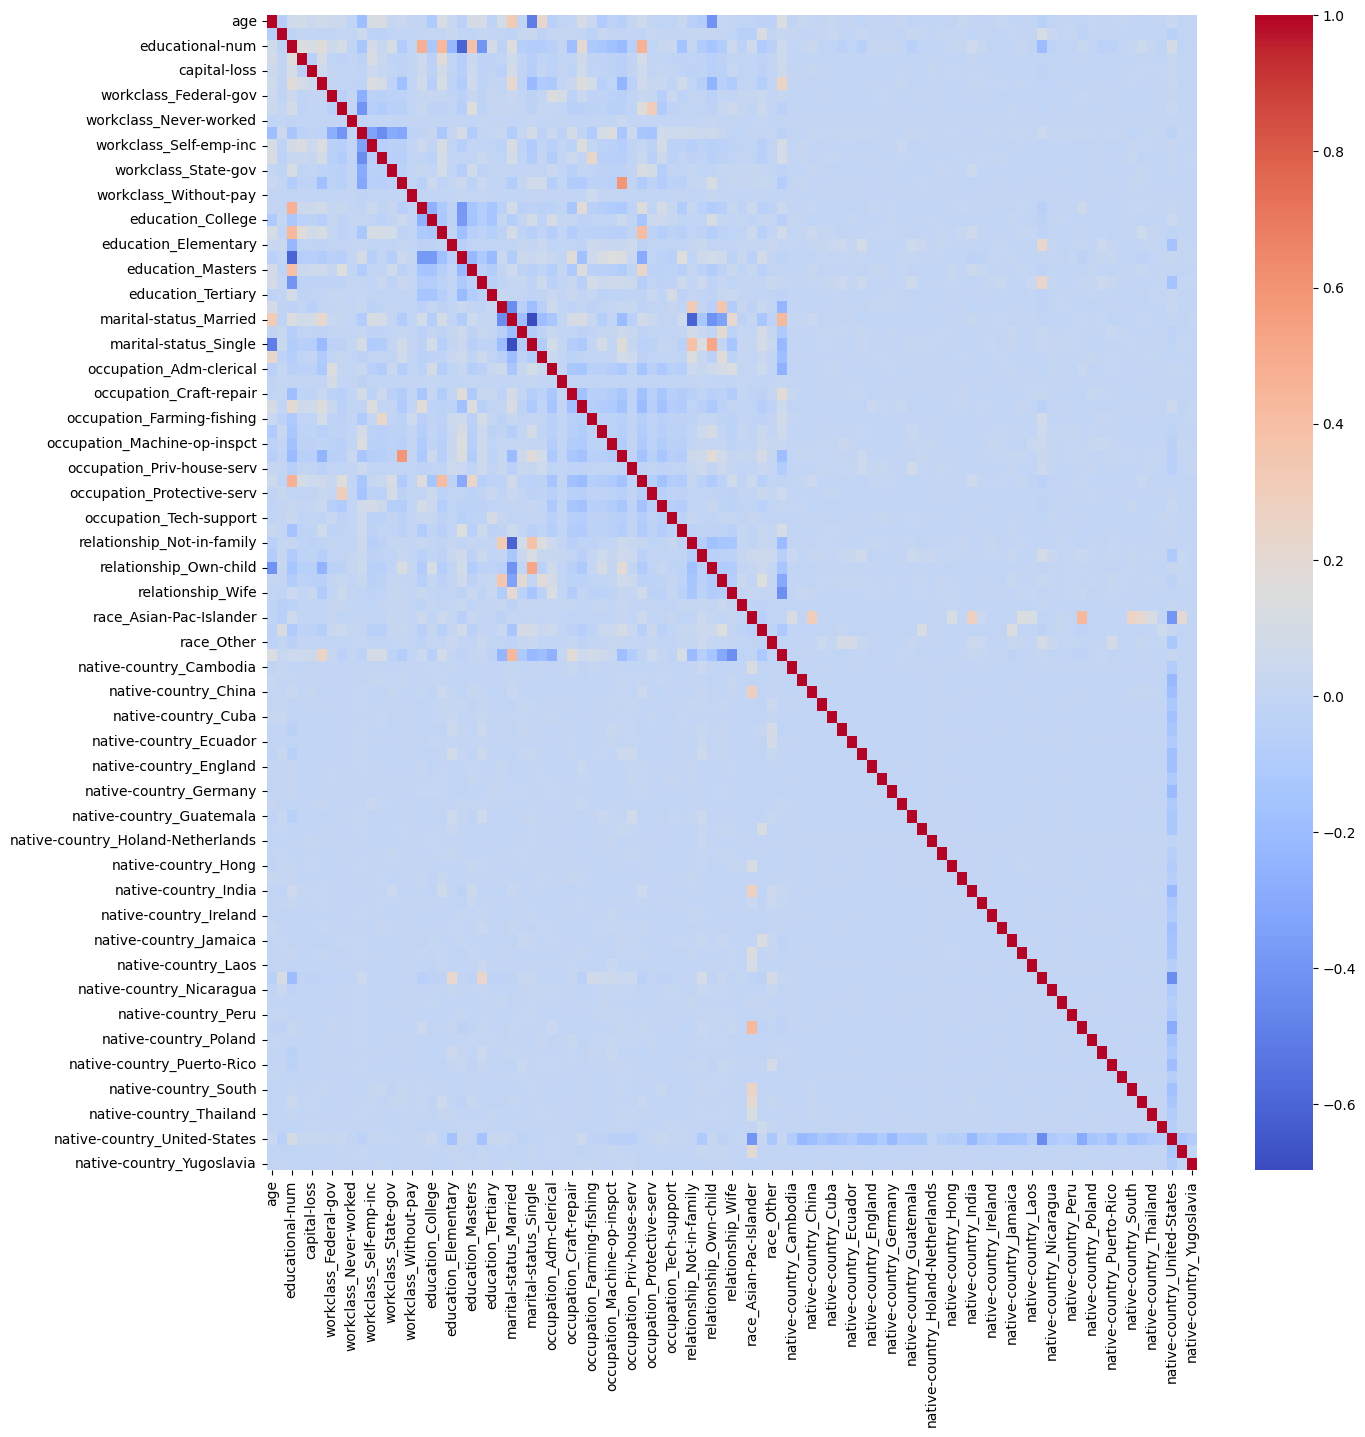

In [47]:
# Make correlation heatmap for features kept (non_collinear features)
corr = X_train_no_corr.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,cmap='coolwarm');


- There are afew strongly correlated features.

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27841
           1       1.00      1.00      1.00     27841

    accuracy                           1.00     55682
   macro avg       1.00      1.00      1.00     55682
weighted avg       1.00      1.00      1.00     55682



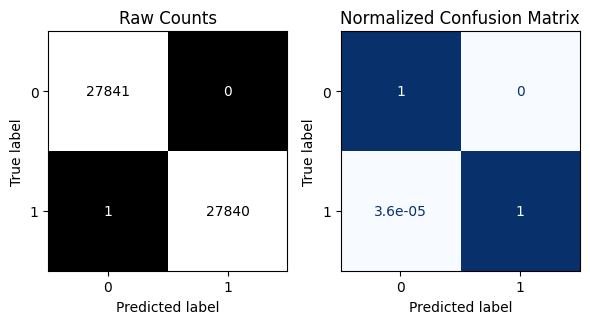


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      9268
           1       0.68      0.69      0.68      2930

    accuracy                           0.85     12198
   macro avg       0.79      0.79      0.79     12198
weighted avg       0.85      0.85      0.85     12198



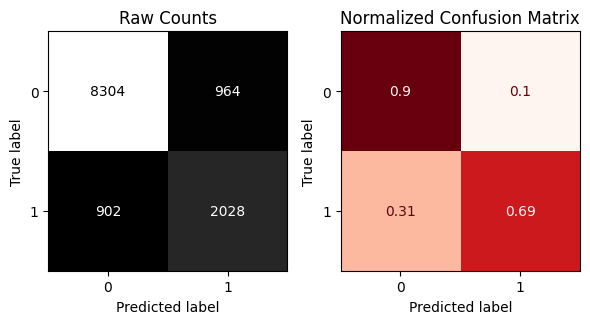

In [48]:
# Test the model performance with only the included features
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_no_corr, y_train_sm)
evaluate_classification(rf_clf, X_train_no_corr, y_train_sm, X_test_no_corr, y_test)

- From the original data, we dropped 4 out of 97 features, and the accuracy remained the same at 0.85 for the test data. The previous models achieved accracy scores of 0.85 and and 0.77 respectively.


In [50]:
#Extract  the top 10 features using permutation importance
from sklearn.inspection import permutation_importance


# Compute permutation importance on the filtered test data
result = permutation_importance(rf_clf, X_test_no_corr, y_test, n_repeats=30, random_state=42, n_jobs=-1)

# Extract the feature names
feature_names = X_train_no_corr.columns

# Display importance scores in descending order
importance_sorted_idx = result.importances_mean.argsort()[::-1]
for i in importance_sorted_idx:
    print(f"{feature_names[i]:<20}: {result.importances_mean[i]:.4f}")


capital-gain        : 0.0354
age                 : 0.0172
marital-status_Married: 0.0077
educational-num     : 0.0072
capital-loss        : 0.0071
hours-per-week      : 0.0057
relationship_Not-in-family: 0.0034
fnlwgt              : 0.0020
occupation_Other-service: 0.0018
occupation_Exec-managerial: 0.0013
workclass_Self-emp-not-inc: 0.0011
workclass_Self-emp-inc: 0.0011
occupation_Handlers-cleaners: 0.0011
occupation_Farming-fishing: 0.0009
race_Black          : 0.0008
workclass_Federal-gov: 0.0007
relationship_Unmarried: 0.0007
marital-status_Single: 0.0007
workclass_Private   : 0.0004
relationship_Own-child: 0.0004
education_Tertiary  : 0.0004
occupation_Tech-support: 0.0004
occupation_Machine-op-inspct: 0.0003
workclass_State-gov : 0.0003
education_Bachelors : 0.0001
race_Other          : 0.0001
native-country_France: 0.0001
native-country_England: 0.0001
native-country_Peru : 0.0001
native-country_United-States: 0.0000
native-country_El-Salvador: 0.0000
occupation_Priv-house-serv:

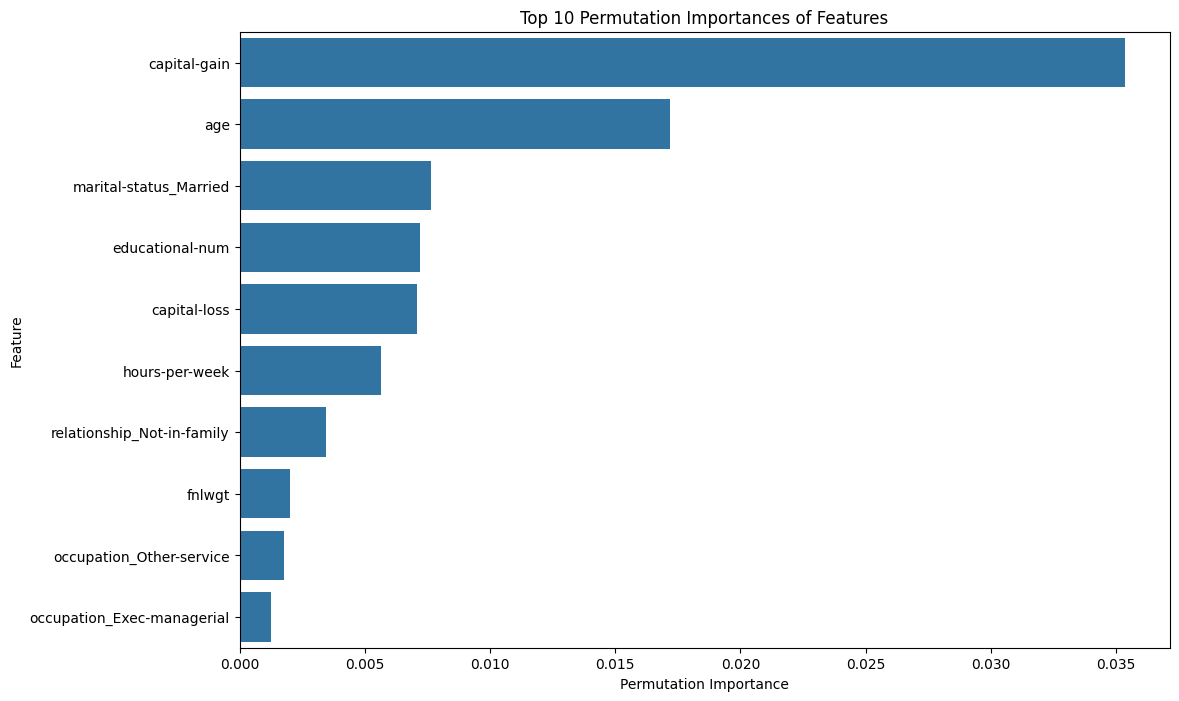

In [51]:
# Get the top 10 features
top_10_idx = importance_sorted_idx[:10]
top_10_importances = result.importances_mean[top_10_idx]
top_10_features = feature_names[top_10_idx]

# Plotting the permutation importances for the top 10 features
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_importances, y=top_10_features)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Top 10 Permutation Importances of Features')
plt.show()

- How these do these features compare to the model from Part 1. Are there any new features in the top 10?
  - There are indeed new features that surfaced, when we compare with the model from part 1. These features include:
      - age
      - relationshp_Not-in-family
      - occupation_Exec-managerial.